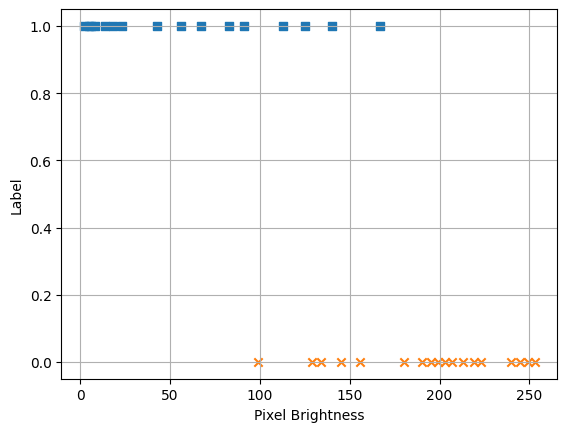

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn.linear_model import LogisticRegression


def sigmoid(x):
  return 1 / (1 + np.exp(-x))


x1 = np.array([2,5,6,8,14,18,23,43,56,67,83,91,113, 125, 140, 167])
x2 = np.array([99, 129, 134, 145, 156,  180, 190, 195, 199, 203, 207, 213, 219, 223, 240, 245, 249, 253])

y1 = np.array([1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1])
y2 = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])


fig = plt.figure()

plt.xlabel('Pixel Brightness')
plt.ylabel('Label')
plt.scatter(x1,y1,marker='s')
plt.scatter(x2,y2, marker='x')
plt.grid()

plt.savefig('./sigmoid.png')

plt.show()

In [18]:
X = np.concatenate([x1,x2])
print(X.shape)
X = np.concatenate([x1,x2]).reshape(-1,1)
#X = np.concatenate([x1,x2])[:, np.newaxis]
y = np.concatenate([y1,y2])
print(X.shape)



(34,)
(34, 1)


In [7]:
clf = LogisticRegression(solver='liblinear')
clf.fit(X, y)
print(f'X data:{X[:,0]}')
print(f'labels                  :{y}')
print(f'Thresholded Predictions: {clf.predict(X)}')

print(f'Logistic Predictions: {clf.predict_proba(X)}')
print(f'Score: {clf.score(X,y)}')
print(f'Decision = {(clf.decision_function(X))}')
print(f'Intercept: {clf.intercept_}')
print(f'Coefficients: {clf.coef_}')
print(f'Classes: {clf.classes_}')


X data:[  2   5   6   8  14  18  23  43  56  67  83  91 113 125 140 167  99 129
 134 145 156 180 190 195 199 203 207 213 219 223 240 245 249 253]
labels                  :[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Thresholded Predictions: [1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Logistic Predictions: [[0.11189996 0.88810004]
 [0.1181285  0.8818715 ]
 [0.12027046 0.87972954]
 [0.12465506 0.87534494]
 [0.1386371  0.8613629 ]
 [0.14867281 0.85132719]
 [0.16205196 0.83794804]
 [0.22530735 0.77469265]
 [0.27492512 0.72507488]
 [0.32183423 0.67816577]
 [0.3967741  0.6032259 ]
 [0.43641872 0.56358128]
 [0.54813361 0.45186639]
 [0.60777173 0.39222827]
 [0.67786643 0.32213357]
 [0.78496452 0.21503548]
 [0.47689293 0.52310707]
 [0.62704558 0.37295442]
 [0.65057612 0.34942388]
 [0.69972602 0.30027398]
 [0.74467573 0.25532427]
 [0.826362   0.173638  ]
 [0.85371983 0.14628017]
 [0.86600507 0.13399493]
 [0.87519525 0.12480475]
 [0.88383965 0.11

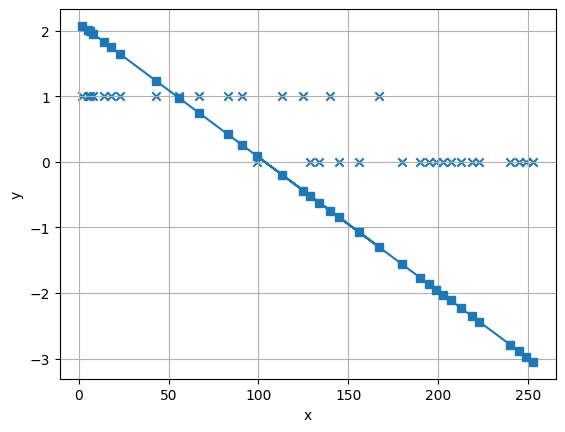

In [21]:
fig = plt.figure()

plt.xlabel('x')
plt.ylabel('y')
plt.plot(X,clf.decision_function(X),marker='s')
plt.scatter(X, y, marker='x')

plt.grid()

plt.show()

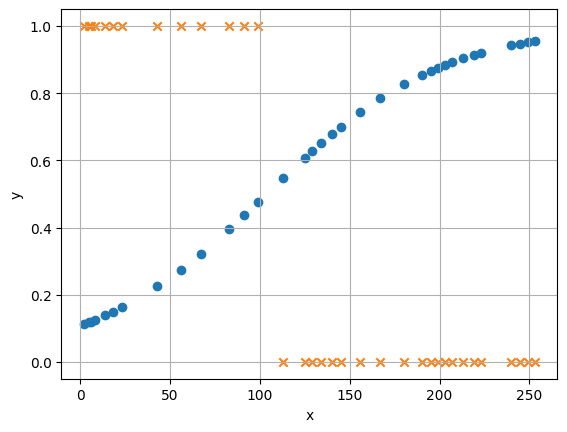

In [9]:
fig = plt.figure()

plt.xlabel('x')
plt.ylabel('y')


plt.grid()

plt.scatter(X, clf.predict_proba(X)[:,0], marker='o')




plt.scatter(X, clf.predict(X), marker='x')
plt.show()

Accuracy: 0.8529411764705882
Confusion Matrix:
[[17  1]
 [ 4 12]]
Precision: 0.9230769230769231
Recall: 0.75
F1_score: 0.8275862068965517


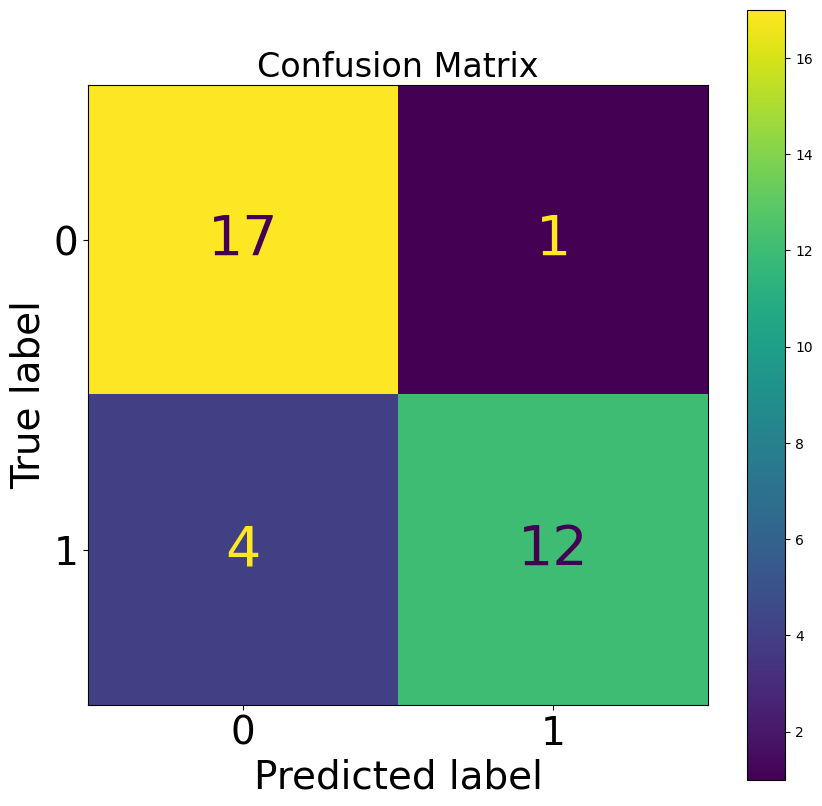

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, ConfusionMatrixDisplay


y_pred = clf.predict(X)

# Evaluate the model
accuracy = accuracy_score(y, y_pred)
conf_matrix = confusion_matrix(y, y_pred)
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)


print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1_score: {f1}')
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                               display_labels=clf.classes_)

fig, ax = plt.subplots(figsize=(10, 10))  # You can adjust the figure size as needed
disp.plot(ax=ax)

# Adjust font sizes
ax.set_title('Confusion Matrix', fontsize=24)  # Adjust title font size
ax.set_xlabel('Predicted label', fontsize=28)  # Adjust x-axis label font size
ax.set_ylabel('True label', fontsize=28)  # Adjust y-axis label font size
ax.tick_params(axis='both', which='major', labelsize=28)  # Adjust tick label font size

for text_array in disp.text_:
    for text in text_array:
        text.set_fontsize(40)  # Adjust the font size as needed
